In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns

In [2]:
#path_temp='C:/Users/ccollazos/Documents/Summan/Corona/TEMP_MINUTOS_summan.csv' #temperaturas_2024_h4
path_temp='C:/Users/ccollazos/Documents/Summan/Corona/Horno4.csv'

In [3]:
#df=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True, delimiter=';',date_format='%d/%m/%Y %H:%M', dayfirst=True)
df=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True)

In [195]:
#df.index = pd.to_datetime(df.index,format='%d/%m/%Y %H:%M')

In [4]:
df.sort_index(inplace=True)

In [5]:
df=df.resample("min").first()

In [6]:
df=df.interpolate(method='time')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509194 entries, 2024-01-01 00:00:00-05:00 to 2024-12-19 14:33:00-05:00
Freq: T
Data columns (total 59 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   k1      509194 non-null  float64
 1   k2      509194 non-null  float64
 2   k3      509194 non-null  float64
 3   k4      509194 non-null  float64
 4   s5      509194 non-null  float64
 5   s6      509194 non-null  float64
 6   s7      509194 non-null  float64
 7   s8      509194 non-null  float64
 8   s9      509194 non-null  float64
 9   s10     509194 non-null  float64
 10  s11     509194 non-null  float64
 11  s12     509194 non-null  float64
 12  s13     509194 non-null  float64
 13  s14     509194 non-null  float64
 14  s15     509194 non-null  float64
 15  s16     509194 non-null  float64
 16  s17     509194 non-null  float64
 17  s18     509194 non-null  float64
 18  s19     509194 non-null  float64
 19  s20     509194 non-null  float64

In [67]:
df.head()

,k1,k2,k3,k4,s5,s6,s7,s8,s9,s10,...,k21,k22,k23,k24,k25,k26,k27,kv28,ke29,ke30
2024-06-01 06:00:00,241,177,345,336,536,491,706,745,1026,1020,...,664,682,620,537,457,311,110,163,161,110
2024-06-01 06:01:00,241,177,345,337,535,491,706,745,1026,1020,...,663,682,620,536,456,309,110,163,161,110
2024-06-01 06:02:00,243,176,346,337,534,491,706,745,1025,1020,...,662,683,620,536,456,308,110,163,161,110
2024-06-01 06:03:00,243,175,347,337,533,491,707,744,1025,1020,...,661,684,620,536,456,308,110,163,160,110
2024-06-01 06:04:00,244,175,348,337,533,492,706,744,1025,1020,...,660,684,620,537,455,307,110,163,160,110


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
k1,255562.0,265.092342,16.514626,212.0,255.0,265.0,275.0,490.0
k2,255562.0,184.447285,10.947905,67.0,178.0,184.0,190.0,393.0
k3,255562.0,361.169708,16.469294,308.0,351.0,361.0,371.0,566.0
k4,255562.0,332.337401,9.596013,176.0,326.0,332.0,339.0,396.0
s5,255562.0,530.655990,12.167864,431.0,524.0,530.0,536.0,730.0
s6,255562.0,497.395665,11.766185,0.0,490.0,495.0,502.0,721.0
s7,255562.0,708.992421,13.404899,540.0,701.0,709.0,717.0,865.0
s8,255562.0,740.365074,5.025901,488.0,738.0,740.0,742.0,837.0
s9,255562.0,1018.370712,8.474263,698.0,1014.0,1019.0,1024.0,1052.0
s10,255562.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0


In [9]:
termo_horno=['k1', 'k2', 'k3', 'k4', 's5', 's6', 's7', 's8', 's9', 's10', 's11','s12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 'k21','k22', 'k23', 'k24', 'k25', 'k26']

<Axes: >

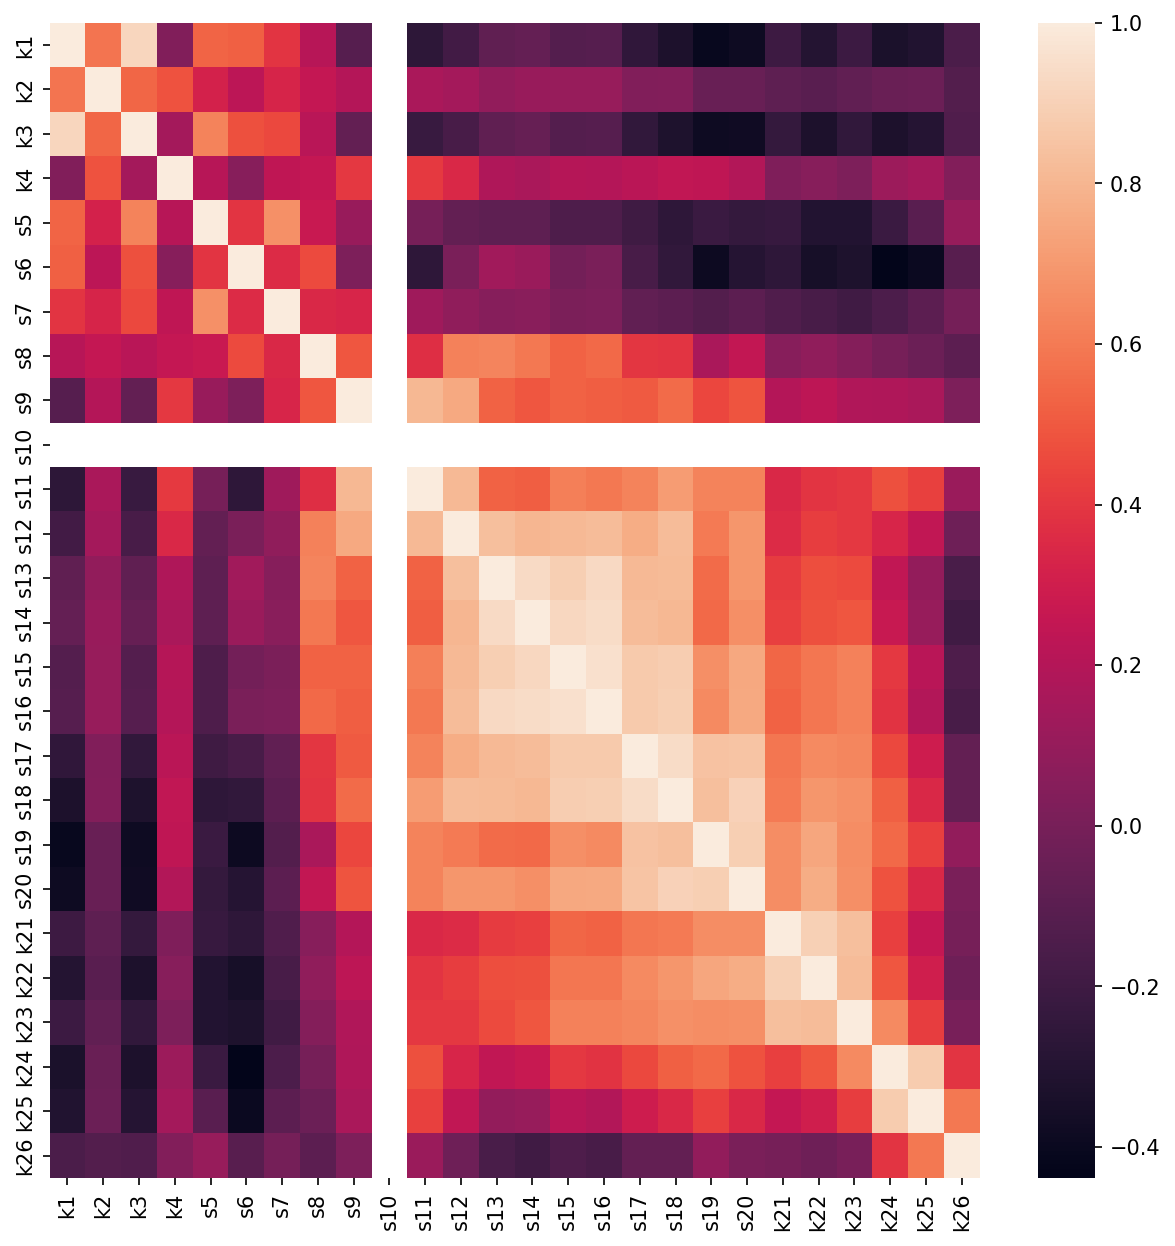

In [11]:
fig, ax = plt.subplots(figsize=(10,10),dpi=150) 
sns.heatmap(df[termo_horno].corr())

<Axes: >

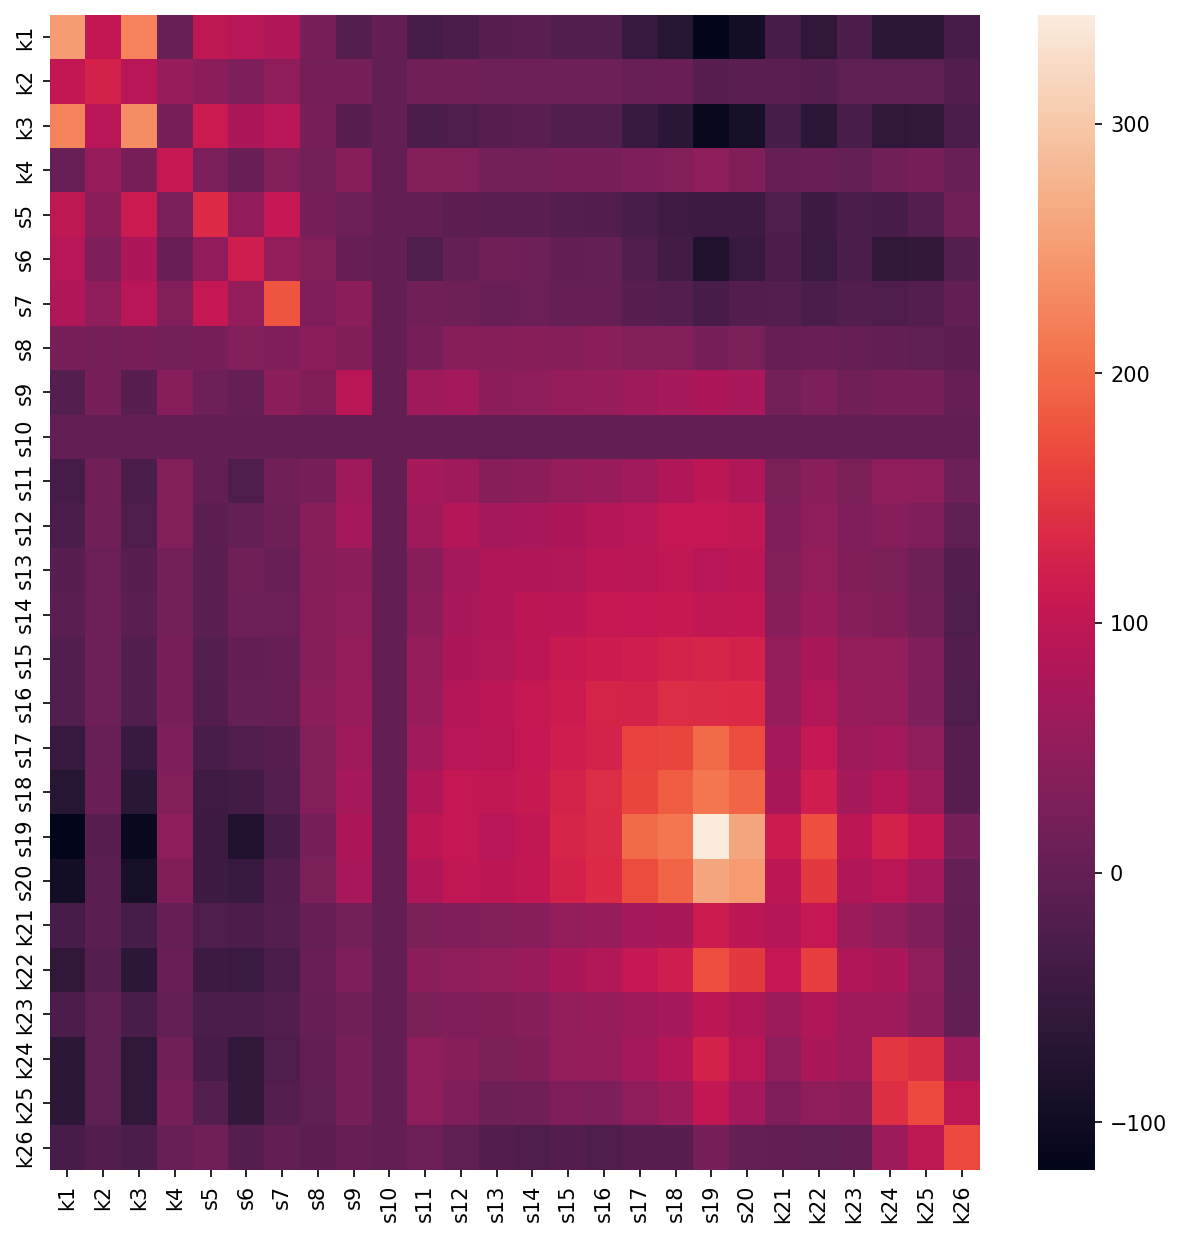

In [13]:
fig, ax = plt.subplots(figsize=(10,10),dpi=150) 
sns.heatmap(df[termo_horno].cov())

### Gp

array([<Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>,
       <Axes: xlabel='_time'>, <Axes: xlabel='_time'>], dtype=object)

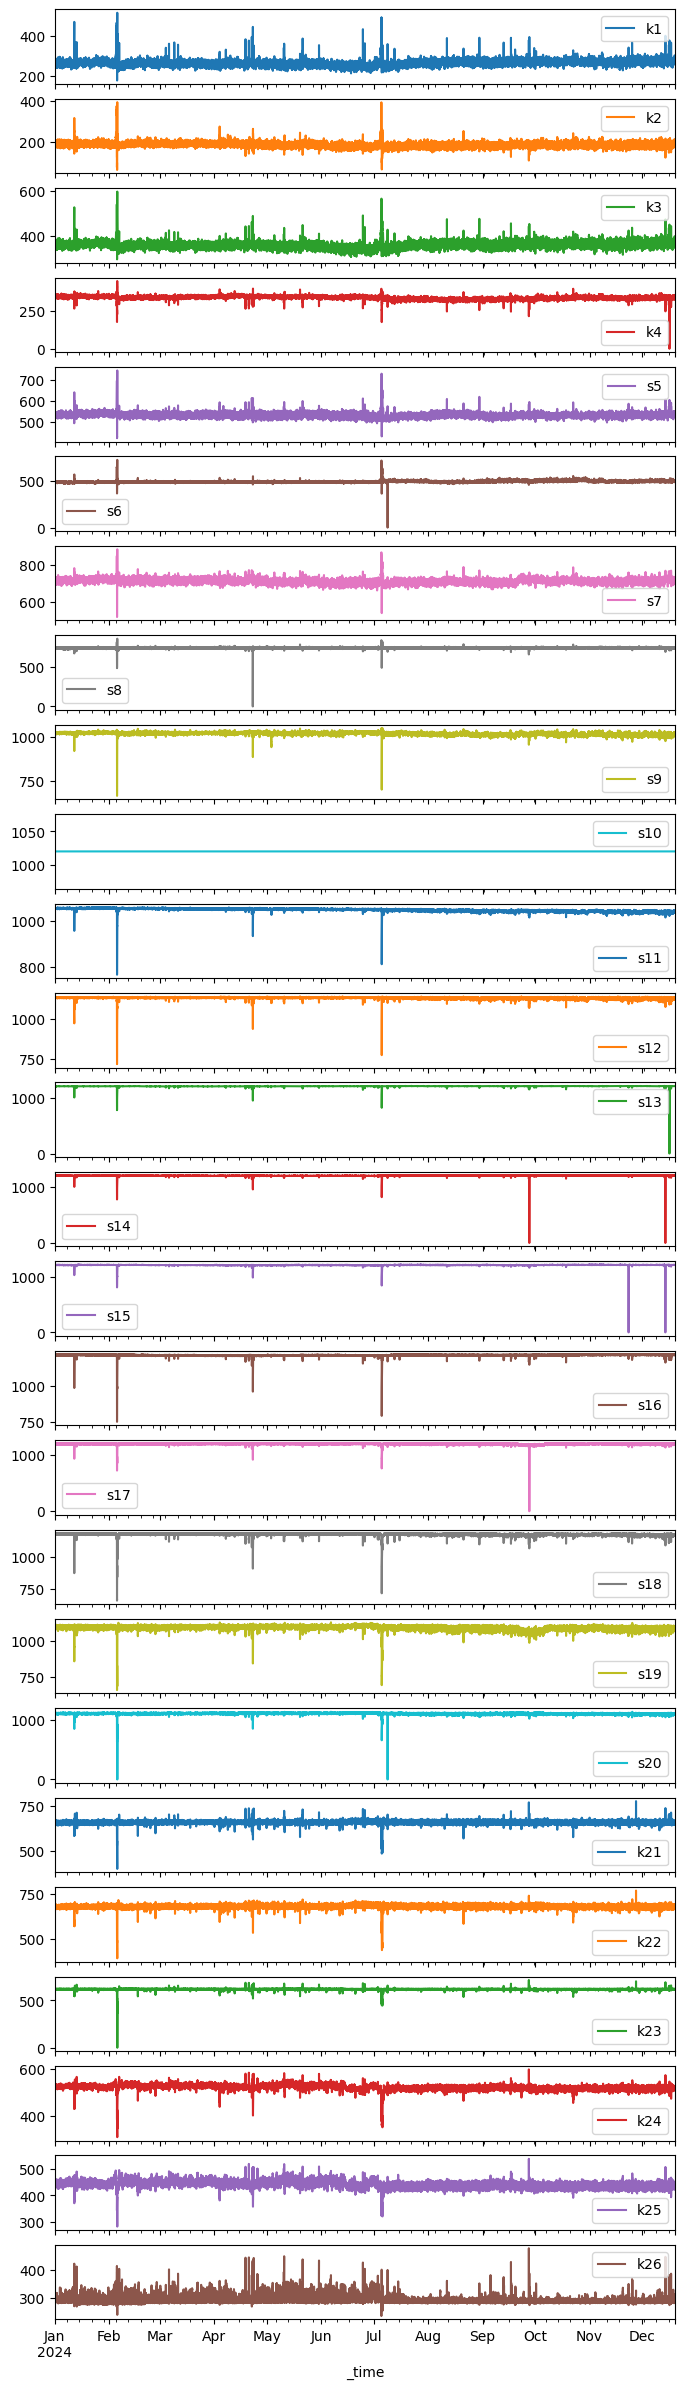

In [107]:
df[termo_horno].plot(subplots=True, figsize=(8,30))

<Axes: >

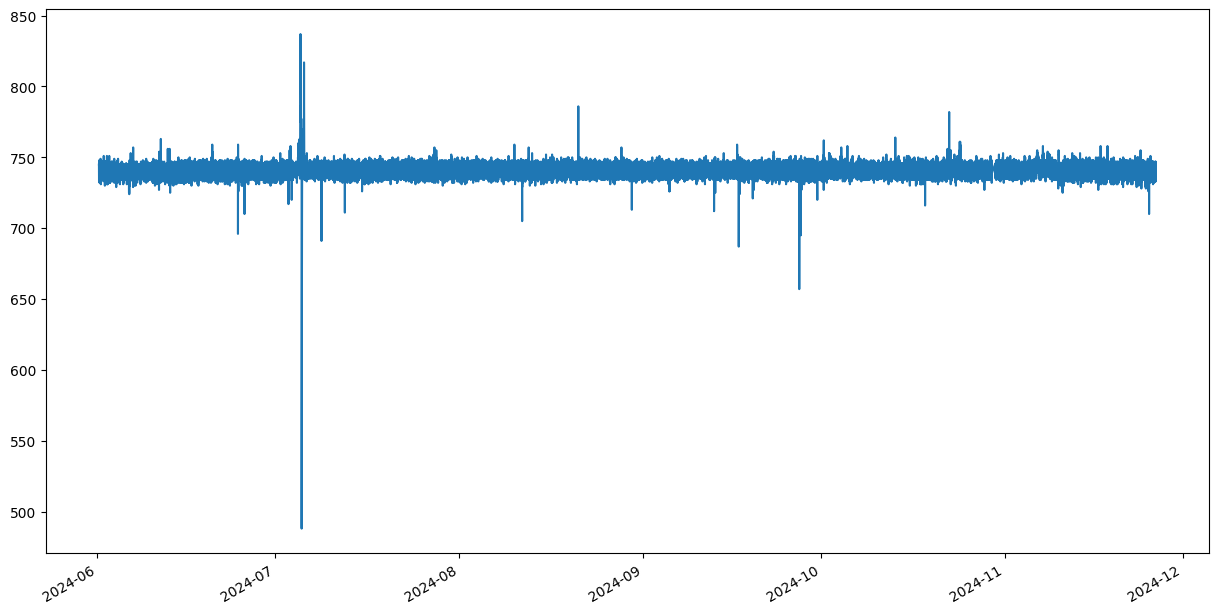

In [255]:
df['s8'].plot(figsize=(15,8))

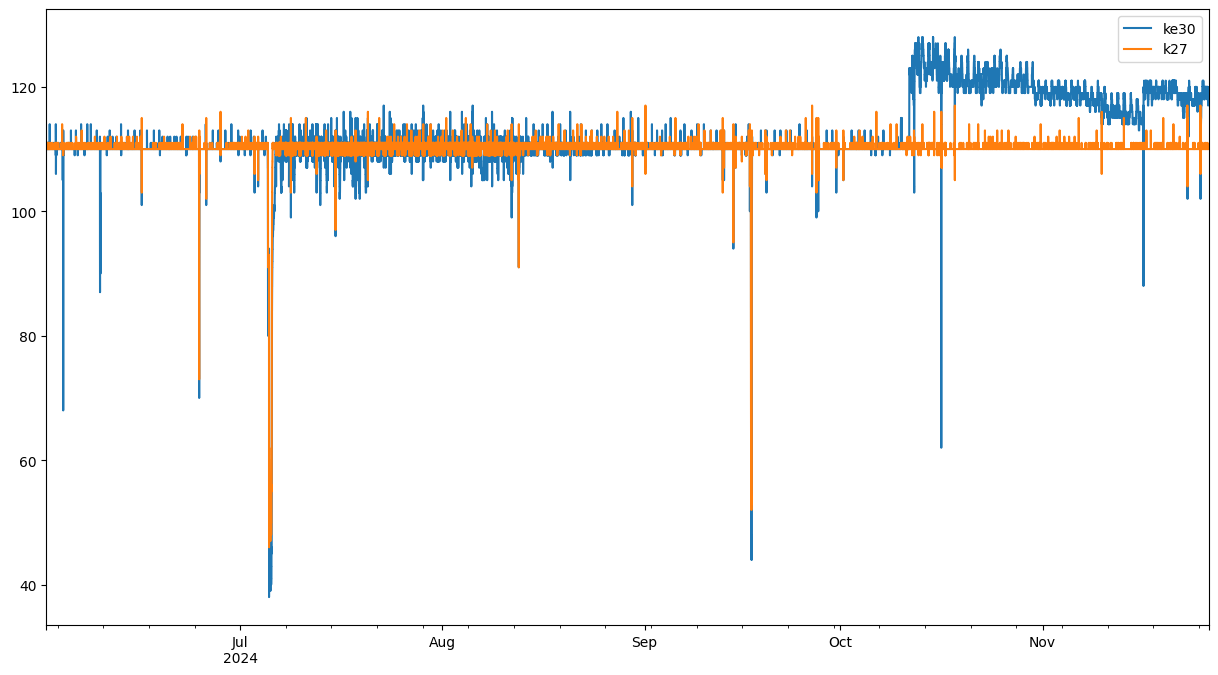

In [19]:
df['ke30'].plot(figsize=(15,8))
df['k27'].plot(figsize=(15,8))
plt.legend()

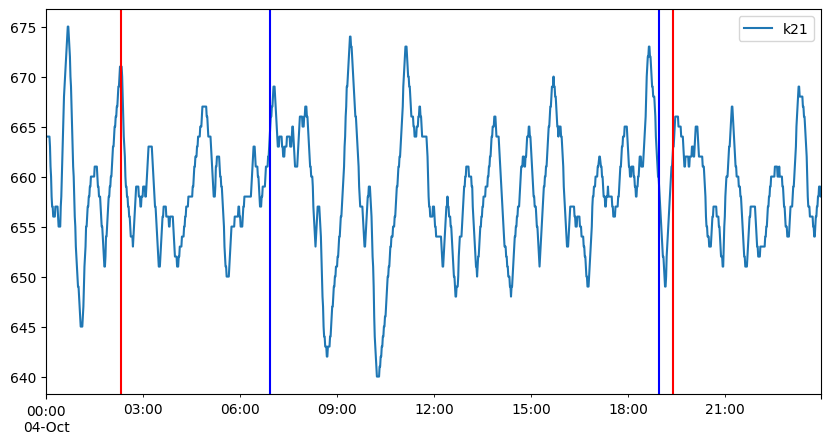

In [183]:
df.loc[df.index.to_period('D')=='2024-10-04',['k21']].plot(figsize=(10,5))
plt.axvline(x=pd.Timestamp('2024-10-04 06:55:00'),color='b')
plt.axvline(x=pd.Timestamp('2024-10-04 19:24:00'),color='r')
plt.axvline(x=pd.Timestamp('2024-10-04 02:18:00'),color='r')
plt.axvline(x=pd.Timestamp('2024-10-04 18:58:00'),color='b')

In [152]:
from aeon.segmentation import ClaSPSegmenter, find_dominant_window_sizes

In [164]:
dominant_period_size=find_dominant_window_sizes(df.loc[df.index.to_period('D')=='2024-10-04',['k21']].values)

In [188]:
clasp = ClaSPSegmenter(period_length=12, n_cps=2)

In [189]:
found_cps = clasp.fit_predict(df.loc[df.index.to_period('D')=='2024-10-04',['k21']].values.reshape((1,-1)))

In [190]:
found_cps

array([1166,  135], dtype=int64)

In [191]:
df.loc[df.index.to_period('D')=='2024-10-04',['k21']].iloc[found_cps].index

DatetimeIndex(['2024-10-04 19:26:00', '2024-10-04 02:15:00'], dtype='datetime64[ns]', freq='-1031T')

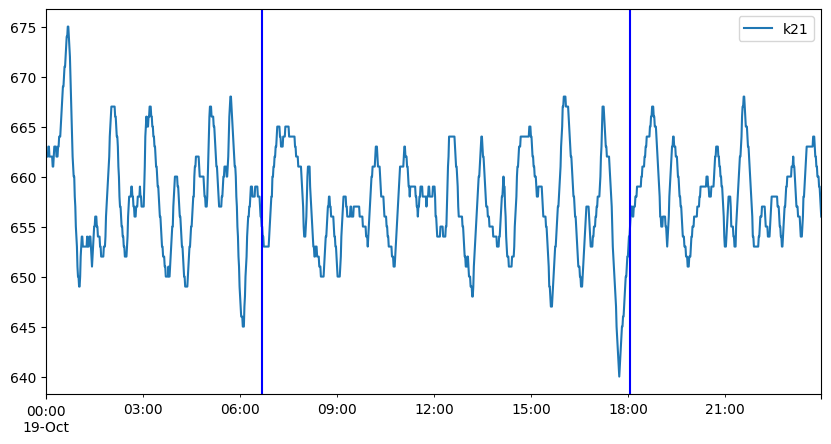

In [ ]:
df.loc[df.index.to_period('D')=='2024-10-19',['k21']].plot(figsize=(10,5))
plt.axvline(x=pd.Timestamp('2024-10-19 06:41:00'),color='b')
plt.axvline(x=pd.Timestamp('2024-10-19 18:04:00'),color='b')

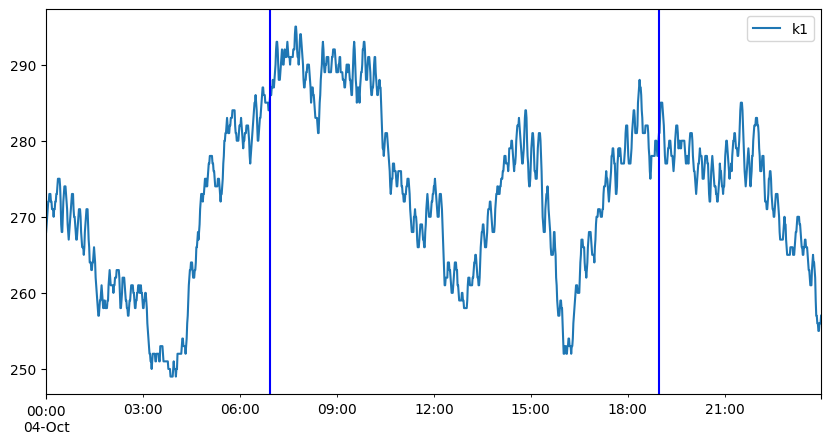

In [138]:
df.loc[df.index.to_period('D')=='2024-10-04',['k1']].plot(figsize=(10,5))
plt.axvline(x=pd.Timestamp('2024-10-04- 06:55:00'),color='b')
plt.axvline(x=pd.Timestamp('2024-10-04- 18:58:00'),color='b')

<Axes: >

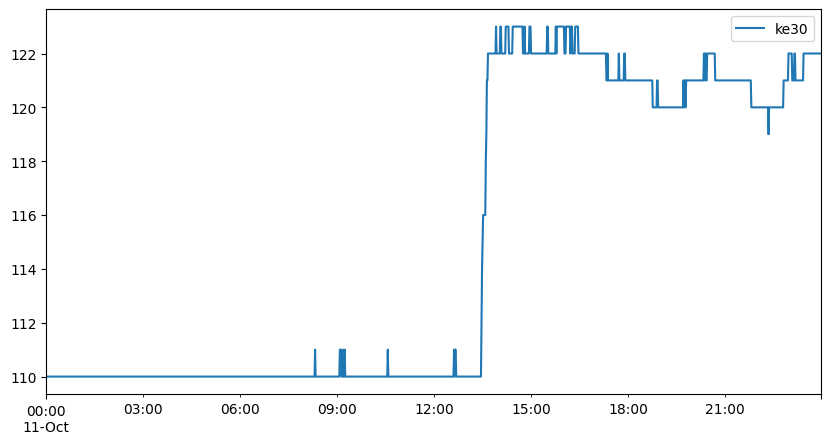

In [18]:
df.loc[df.index.to_period('D')=='2024-10-11',['ke30']].plot(figsize=(10,5))

In [14]:
from sklearn.decomposition import PCA

In [15]:
data_xy=PCA(2).fit_transform(df[termo_horno])

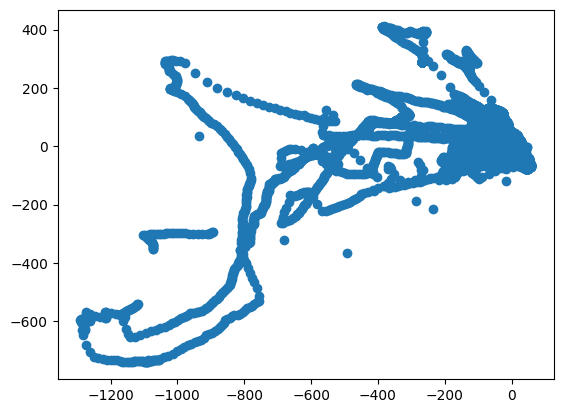

In [16]:
plt.scatter(data_xy[:,0],data_xy[:,1])

### Deteccion de anomalias

In [17]:
from sklearn.cluster import KMeans

In [18]:
model_c=KMeans(4).fit(df[termo_horno])

In [20]:
df[termo_horno].loc[model_c.labels_==0].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,270772.0,255.161684,9.618562,211.8,249.3,256.0,261.9,377.6
k2,270772.0,184.320085,8.767091,110.1,178.4,184.7,190.6,219.6
k3,270772.0,353.271264,10.248774,307.8,347.0,354.3,360.6,443.5
k4,270772.0,337.686799,9.277573,0.0,332.0,339.0,344.0,368.0
s5,270772.0,530.465043,9.098596,493.1,524.3,530.9,537.0,586.7
s6,270772.0,490.396714,5.335667,459.0,487.0,490.0,492.0,539.0
s7,270772.0,709.500627,11.895717,661.0,701.6,709.9,717.8,756.1
s8,270772.0,739.184672,4.009099,0.0,737.0,739.0,742.0,756.0
s9,270772.0,1021.956523,6.232006,942.6,1018.7,1023.0,1026.3,1040.7
s10,270772.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0


In [21]:
df[termo_horno].loc[model_c.labels_==1].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,348.0,282.993966,72.849879,176.4,226.075,253.20,366.250,443.2
k2,348.0,97.842241,38.496951,64.4,71.200,90.20,102.275,225.9
k3,348.0,378.793678,58.727586,297.2,318.800,370.70,440.175,489.4
k4,348.0,227.623563,38.218079,176.0,187.750,227.00,250.000,352.0
s5,348.0,525.874138,79.997198,422.2,460.150,519.10,565.000,696.1
s6,348.0,429.522989,50.155344,365.0,391.750,411.50,469.000,567.0
s7,348.0,642.619253,97.955488,518.4,566.550,606.35,701.125,844.9
s8,348.0,573.083333,78.865379,484.0,504.000,537.00,658.250,740.0
s9,348.0,815.249425,117.697090,662.4,703.450,807.85,891.850,1042.5
s10,348.0,1020.000000,0.000000,1020.0,1020.000,1020.00,1020.000,1020.0


In [23]:
df[termo_horno].loc[model_c.labels_==2].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,1318.0,361.990061,83.644520,253.3,298.325,321.25,467.925,513.5
k2,1318.0,211.952238,75.467100,73.8,157.000,205.80,248.050,394.0
k3,1318.0,461.920296,65.713719,346.3,418.850,427.40,549.050,597.2
k4,1318.0,332.014416,38.899679,237.0,310.000,318.00,366.000,447.0
s5,1318.0,636.480728,58.271067,493.5,603.525,617.70,698.425,745.1
s6,1318.0,593.672989,65.623810,0.0,550.000,581.00,660.000,728.0
s7,1318.0,787.918437,44.692787,692.1,753.825,783.25,845.200,881.9
s8,1318.0,759.329287,33.463623,670.0,742.000,761.00,777.000,856.0
s9,1318.0,1011.177656,35.715613,902.1,990.900,1025.40,1036.700,1052.1
s10,1318.0,1020.000000,0.000000,1020.0,1020.000,1020.00,1020.000,1020.0


In [24]:
df[termo_horno].loc[model_c.labels_==3].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,236756.0,274.207337,11.872169,234.5,267.2,273.1,279.6,464.0
k2,236756.0,191.040257,10.344114,116.8,184.6,190.5,196.6,375.2
k3,236756.0,370.731364,11.709890,329.1,363.7,370.1,376.5,540.4
k4,236756.0,336.553040,10.102872,224.0,329.0,336.0,344.0,396.0
s5,236756.0,534.174501,10.012430,493.4,528.3,533.8,539.4,696.1
s6,236756.0,498.160401,10.167973,470.0,491.0,496.0,503.0,651.0
s7,236756.0,714.126192,12.102081,666.8,706.7,714.0,721.2,844.9
s8,236756.0,740.699277,4.327541,671.0,738.0,740.0,743.0,811.0
s9,236756.0,1018.317870,7.622667,945.7,1013.3,1018.7,1023.9,1049.6
s10,236756.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0


# modelo por secciones

In [33]:
grupos=[termo_horno[0:9],termo_horno[8:20],termo_horno[20:26]]

Grupo 0

In [36]:
modelo_grupo1=KMeans(4).fit(df[grupos[0]])

In [85]:
df[grupos[0]].loc[modelo_grupo1.labels_==0].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,134672.0,249.649907,9.199697,176.4,244.0,250.1,256.0,372.5
k2,134672.0,178.784167,8.246133,64.4,174.1,179.2,184.0,205.1
k3,134672.0,346.215741,8.823705,297.2,341.2,347.2,352.3,442.3
k4,134672.0,333.084173,10.464622,0.0,326.0,334.0,340.0,360.0
s5,134672.0,525.312136,8.896436,422.2,519.5,525.2,531.1,586.7
s6,134672.0,491.613159,7.721210,365.0,487.0,490.0,495.0,538.0
s7,134672.0,702.809998,11.969737,518.4,695.7,703.2,710.4,752.2
s8,134672.0,738.716519,8.873016,0.0,737.0,739.0,741.0,753.0
s9,134672.0,1019.616553,12.947595,662.4,1015.9,1021.0,1025.2,1041.0


In [86]:
df[grupos[0]].loc[modelo_grupo1.labels_==1].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,258855.0,263.751750,7.122292,237.0,258.9,264.1,268.9,336.6
k2,258855.0,187.939404,7.005052,107.0,183.2,188.0,192.7,218.9
k3,258855.0,361.779156,6.449478,337.7,357.3,362.0,366.4,428.5
k4,258855.0,337.730671,9.032178,264.0,331.0,339.0,345.0,368.0
s5,258855.0,532.960725,7.362486,493.5,527.8,532.9,537.9,587.6
s6,258855.0,492.821294,7.104273,0.0,488.0,491.0,496.0,541.0
s7,258855.0,713.428154,10.147689,673.2,706.7,713.6,720.5,754.0
s8,258855.0,739.750627,3.445860,671.0,738.0,740.0,742.0,760.0
s9,258855.0,1020.876772,6.719781,936.0,1016.9,1022.2,1025.8,1042.9


In [43]:
df[grupos[0]].loc[modelo_grupo1.labels_==2].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,114919.0,281.516483,10.160479,255.6,275.6,279.8,285.1,443.2
k2,114919.0,196.155530,11.045437,70.3,190.8,195.5,200.6,310.7
k3,114919.0,378.474481,9.357851,355.5,372.7,376.8,382.1,500.4
k4,114919.0,340.296929,11.081161,177.0,334.0,340.0,347.0,397.0
s5,114919.0,538.656956,10.351973,497.6,532.9,537.8,542.8,696.1
s6,114919.0,499.471093,11.718786,373.0,491.0,497.0,505.0,618.0
s7,114919.0,717.900353,12.263902,591.2,710.6,717.2,724.3,844.9
s8,114919.0,740.961751,7.373086,494.0,739.0,741.0,743.0,786.0
s9,114919.0,1018.863079,10.219803,689.9,1013.9,1019.5,1024.8,1049.6


In [44]:
df[grupos[0]].loc[modelo_grupo1.labels_==3].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,748.0,455.283957,41.832605,323.0,448.700,455.90,489.1,513.5
k2,748.0,245.687567,90.723339,127.9,205.800,205.80,343.3,394.0
k3,748.0,536.970588,31.802980,437.4,525.075,540.40,558.6,597.2
k4,748.0,330.109626,34.285536,261.0,310.000,317.00,347.0,447.0
s5,748.0,694.761230,33.230334,601.7,669.150,696.10,727.8,745.1
s6,748.0,649.192513,43.722997,477.0,634.000,648.00,676.0,728.0
s7,748.0,835.573396,23.868085,757.6,822.650,844.90,847.5,881.9
s8,748.0,792.213904,28.241969,674.0,777.000,793.00,811.0,856.0
s9,748.0,1025.311096,25.920582,919.6,1025.400,1028.75,1042.5,1052.1


Grupo 1

In [45]:
modelo_grupo2=KMeans(4).fit(df[grupos[1]])

In [53]:
df[grupos[1]].loc[modelo_grupo2.labels_==0].describe().T

,count,mean,std,min,25%,50%,75%,max
s9,372220.0,1021.898578,6.079112,950.3,1018.4,1022.9,1026.3,1044.3
s10,372220.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0
s11,372220.0,1049.164377,5.009448,1022.1,1046.3,1050.4,1052.7,1060.3
s12,372220.0,1132.991485,2.941425,1105.0,1133.0,1134.0,1135.0,1141.0
s13,372220.0,1215.845567,2.539348,0.0,1215.0,1216.0,1217.0,1224.0
s14,372220.0,1208.874949,2.314099,1184.0,1207.0,1209.0,1211.0,1217.0
s15,372220.0,1220.274965,1.827534,1186.0,1219.0,1220.0,1222.0,1226.0
s16,372220.0,1211.732256,2.258338,1184.0,1210.0,1212.0,1213.0,1220.0
s17,372220.0,1199.978836,1.964333,1182.0,1199.0,1200.0,1201.0,1208.0
s18,372220.0,1181.167878,2.234884,1142.0,1180.0,1182.0,1183.0,1190.0


In [88]:
df[grupos[1]].loc[modelo_grupo2.labels_==1].describe().T

,count,mean,std,min,25%,50%,75%,max
s9,250.0,787.0884,127.693444,662.4,697.250,730.4,825.875,1042.5
s10,250.0,1020.0000,0.000000,1020.0,1020.000,1020.0,1020.000,1020.0
s11,250.0,849.3072,94.928691,766.2,782.075,813.4,862.625,1044.2
s12,250.0,802.1640,64.911564,720.0,753.000,787.0,839.500,1119.0
s13,250.0,894.1640,76.519947,784.0,836.250,869.0,958.500,1219.0
s14,250.0,863.0720,99.200554,0.0,821.000,854.0,917.750,994.0
s15,250.0,877.5800,72.007276,0.0,843.250,875.0,913.750,1192.0
s16,250.0,832.1040,60.871690,751.0,792.000,819.0,869.750,1216.0
s17,250.0,835.1480,91.556323,0.0,782.000,810.5,908.750,1199.0
s18,250.0,780.7520,87.892976,655.0,711.250,765.5,859.750,1174.0


In [89]:
df[grupos[1]].loc[modelo_grupo2.labels_==2].describe().T

,count,mean,std,min,25%,50%,75%,max
s9,832.0,981.761238,51.685276,840.3,943.875,990.8,1032.05,1052.1
s10,832.0,1020.000000,0.000000,1020.0,1020.000,1020.0,1020.00,1020.0
s11,832.0,979.588101,43.367303,853.1,953.175,979.2,1017.15,1044.3
s12,832.0,1058.820913,58.956778,908.0,1014.000,1063.5,1117.00,1141.0
s13,832.0,1125.665264,63.739061,957.0,1084.000,1121.0,1175.00,1218.0
s14,832.0,1101.754207,63.425653,962.0,1057.000,1095.5,1145.00,1212.0
s15,832.0,1073.112981,66.273395,0.0,1022.750,1074.0,1115.00,1213.0
s16,832.0,1055.503005,61.334799,941.0,995.750,1055.0,1102.25,1214.0
s17,832.0,1014.310096,68.911810,858.0,960.000,1026.5,1077.00,1194.0
s18,832.0,981.867188,63.671763,841.0,931.000,989.5,1041.00,1164.0


In [90]:
df[grupos[1]].loc[modelo_grupo2.labels_==3].describe().T

,count,mean,std,min,25%,50%,75%,max
s9,135892.0,1015.820136,7.968104,942.6,1010.9,1016.0,1020.8,1051.4
s10,135892.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0
s11,135892.0,1041.914551,5.488899,983.2,1038.6,1042.1,1045.1,1058.3
s12,135892.0,1129.522274,5.655357,1062.0,1127.0,1131.0,1134.0,1142.0
s13,135892.0,1217.119695,2.676718,1120.0,1217.0,1217.0,1218.0,1223.0
s14,135892.0,1210.833149,3.544514,1115.0,1210.0,1211.0,1213.0,1217.0
s15,135892.0,1220.265998,4.426273,1118.0,1220.0,1221.0,1222.0,1227.0
s16,135892.0,1212.785657,4.735520,1110.0,1212.0,1213.0,1215.0,1220.0
s17,135892.0,1193.667340,8.751406,1092.0,1190.0,1196.0,1200.0,1206.0
s18,135892.0,1174.068942,8.694502,1054.0,1172.0,1176.0,1179.0,1187.0


Grupo 3

In [99]:
modelo_grupo3=KMeans(2).fit(df[grupos[2]])

In [100]:
df[grupos[2]].loc[modelo_grupo3.labels_==0].describe().T

,count,mean,std,min,25%,50%,75%,max
k21,398220.0,658.177817,10.051360,398.2,655.1,658.6,662.3,777.3
k22,398220.0,678.077370,13.515262,393.0,674.5,678.7,683.0,766.6
k23,398220.0,618.955442,8.790516,0.0,619.0,620.0,621.0,703.0
k24,398220.0,519.486650,11.336186,309.0,515.4,520.6,525.4,543.0
k25,398220.0,437.892635,9.978881,283.6,432.3,438.4,444.4,464.1
k26,398220.0,291.311679,4.928666,238.0,289.0,290.0,293.0,387.0


In [101]:
df[grupos[2]].loc[modelo_grupo3.labels_==1].describe().T

,count,mean,std,min,25%,50%,75%,max
k21,110974.0,658.474347,5.585000,574.6,655.1,658.2,661.5,770.5
k22,110974.0,679.105739,7.889609,512.8,675.0,678.9,683.1,758.8
k23,110974.0,620.103398,2.523077,547.0,619.0,620.0,621.0,717.0
k24,110974.0,534.575840,6.923021,456.3,530.3,534.2,538.6,598.8
k25,110974.0,458.919499,8.509204,417.1,453.0,457.8,463.9,537.1
k26,110974.0,315.305707,15.211690,282.0,305.0,313.0,323.0,475.0


In [98]:
df[grupos[2]].loc[modelo_grupo3.labels_==2].describe().T

,count,mean,std,min,25%,50%,75%,max
k21,400490.0,658.621691,6.255979,576.5,655.1,658.6,662.3,777.3
k22,400490.0,678.728784,7.366820,583.3,674.6,678.7,683.0,766.6
k23,400490.0,619.400772,3.989088,540.0,619.0,620.0,621.0,703.0
k24,400490.0,520.035821,8.271571,404.7,515.5,520.7,525.5,543.6
k25,400490.0,438.304363,8.759128,362.6,432.5,438.6,444.6,464.1
k26,400490.0,291.301699,4.518650,271.0,289.0,291.0,293.0,356.0


In [72]:
import pickle

In [80]:
modelos_c=[modelo_grupo3,modelo_grupo2,modelo_grupo1,model_c]
modelos_names=['modelo_grupo3','modelo_grupo2','modelo_grupo1','model_c']

In [ ]:
# for i,j in zip(modelos_names,modelos_c):
#     with open(i+'.pkl','wb') as f:
#         pickle.dump(j,f)

In [308]:
df.loc[model_c.labels_==2].index.to_period('D').unique()

PeriodIndex(['2024-07-05', '2024-07-08', '2024-09-27'], dtype='period[D]')

In [114]:
cond_01=((df.index.to_period('D')=='2024-07-04') | (df.index.to_period('D')=='2024-07-05'))

<Axes: >

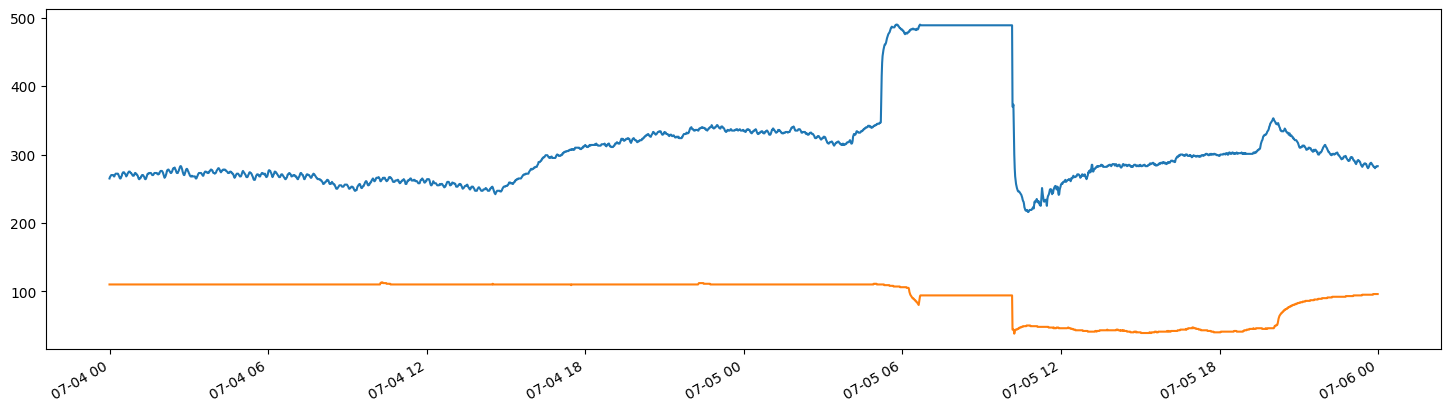

In [117]:
df['k1'].loc[cond_01].plot(figsize=(18,5))
df['ke30'].loc[cond_01].plot(figsize=(18,5))

<Axes: >

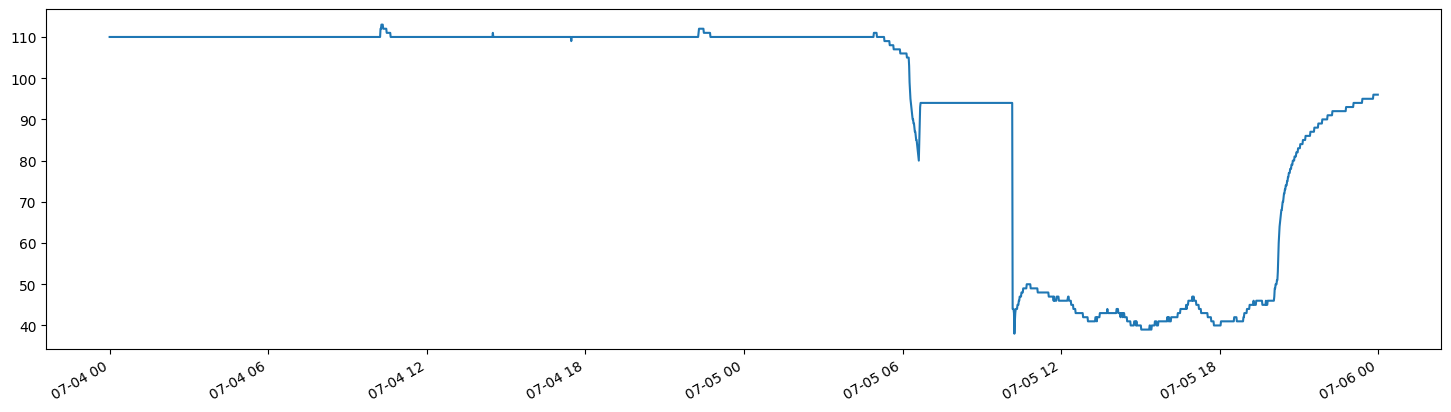

In [116]:
df['ke30'].loc[cond_01].plot(figsize=(18,5))

<Axes: >

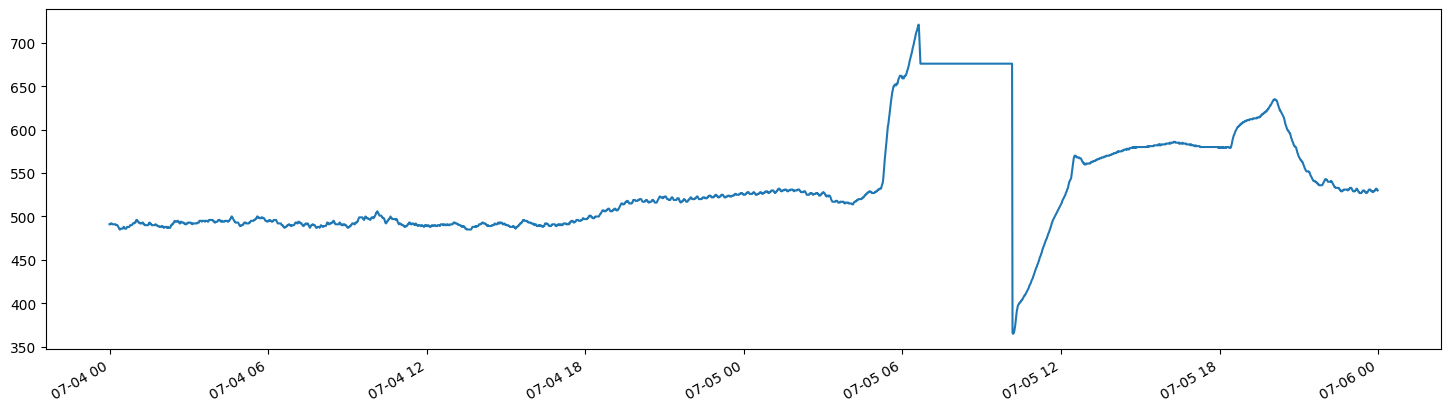

In [236]:
df['s6'].loc[cond_01].plot(figsize=(18,5))

<Axes: >

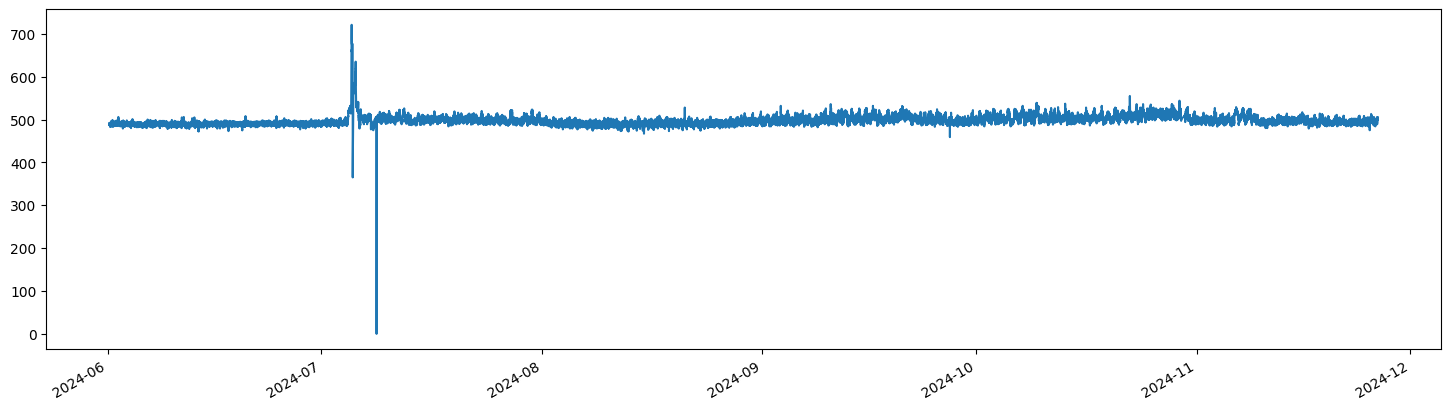

In [235]:
df['s6'].plot(figsize=(18,5))

In [108]:
import modelo_ini_corona as cu

In [121]:
anoma_k1=cu.anomalias_serie_tiempo(df['k2'].values,15,3.5)

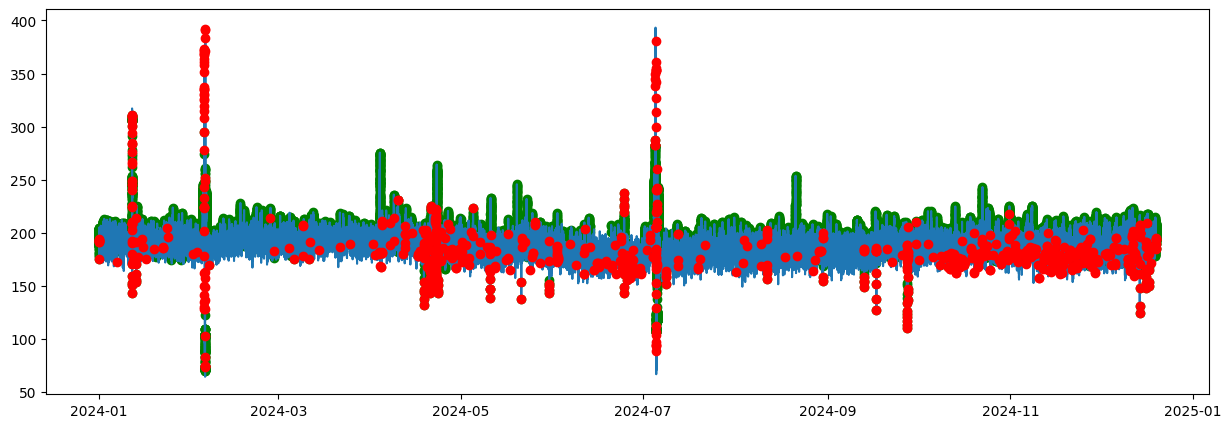

In [139]:
plt.figure(figsize=(15,5))
plt.plot(df.index,df.k2)
plt.plot(df.index[anoma_k1['anomalias'][:,0].astype(int)],anoma_k1['anomalias'][:,1],'or' )
# plt.scatter(df[grupos[0]].loc[modelo_grupo1.labels_==2,['k2']].index,df[grupos[0]].loc[modelo_grupo1.labels_==2,['k2']].k2.values, color='green')

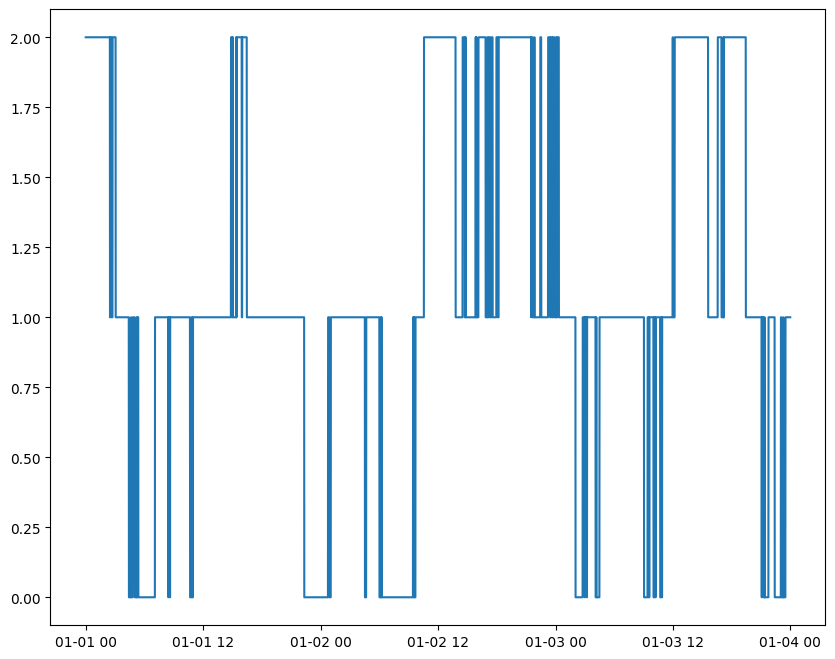

In [153]:
plt.figure(figsize=(10,8))
plt.plot(df.index[0:1440*3],modelo_grupo1.labels_[0:1440*3])

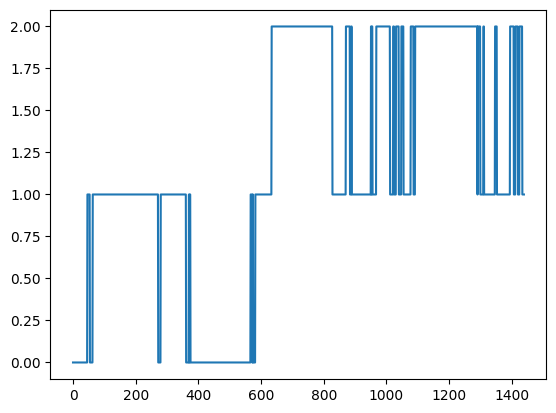

In [147]:
plt.plot(modelo_grupo1.labels_[1440:2*1440])

In [142]:
modelo_grupo1.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [144]:
grupos[0]

['k1', 'k2', 'k3', 'k4', 's5', 's6', 's7', 's8', 's9']

<Axes: >

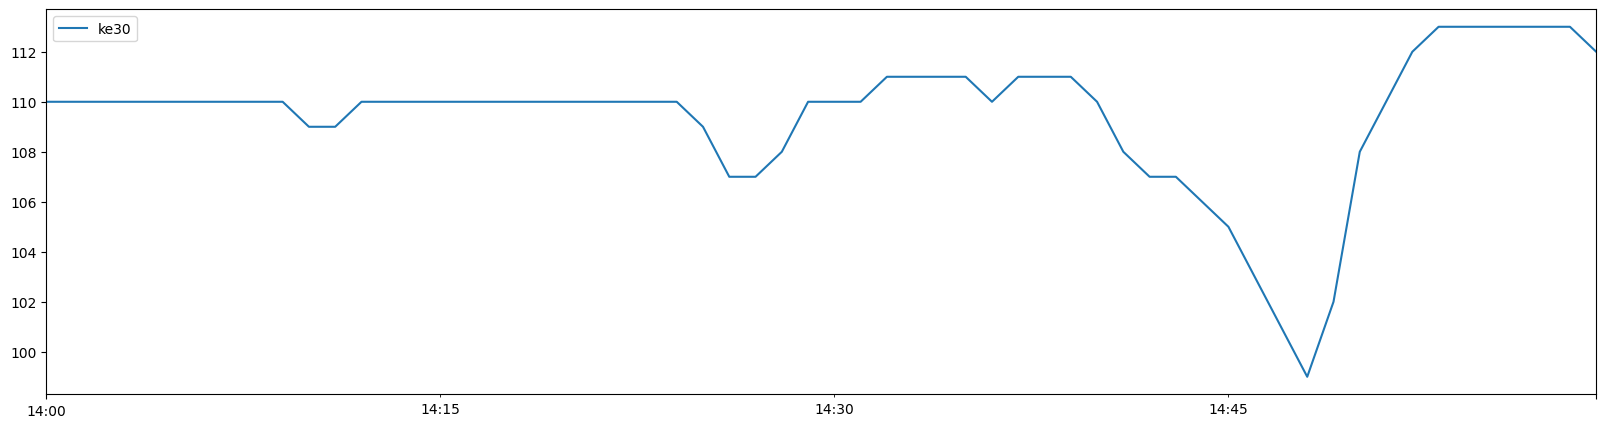

In [225]:
df.loc[df.index.to_period('H')=='2024-08-11 14:00:00',['ke30']].plot(figsize=(20,5))

<Axes: >

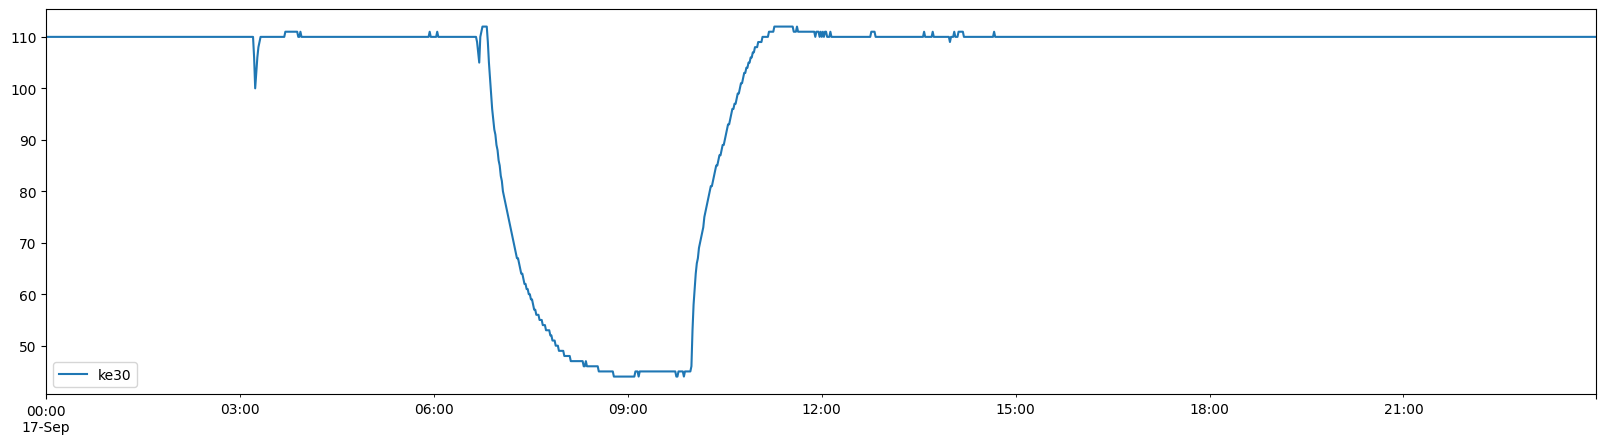

In [228]:
df.loc[df.index.to_period('D')=='2024-09-17',['ke30']].plot(figsize=(20,5))

### Series Segmentation

In [ ]:
from aeon.segmentation import ClaSPSegmenter, find_dominant_window_sizes

In [358]:
dp_k1=find_dominant_window_sizes(df['k1'])

In [ ]:
clasp=ClaSPSegmenter(period_length=dp_k1, n_cps=5)
# cpl_enc_k1=clasp.fit_predict(df['k1'])

In [361]:
profiles_cla=clasp.profiles
scores=clasp.scores

In [371]:
cpl_enc_k1=np.array([ 13369, 234993,  73009,  29612,  57016])

array([ 13369, 234993,  73009,  29612,  57016], dtype=int64)

In [375]:
df['k1'].values[cpl_enc_k1]

array([258, 274, 258, 244, 246], dtype=int64)

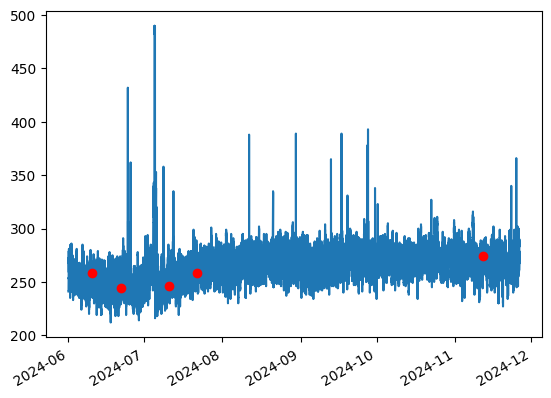

In [377]:
df['k1'].plot()
plt.plot(df.index[cpl_enc_k1],df['k1'].values[cpl_enc_k1],'or')

# Curva: entendimiento

In [400]:
col_temp=['k2','k4','s6','s8','s10','s12','s14','s16','s18','s20','k22','k23','k24','k25','k26']
col_temp_2=['k1','k3','s5','s7','s9','s11','s13','s15','s17','s19','k21','k23','k24','k25','k26']

In [398]:
distancias=np.array([15.1195,17.2895,21.4885,31.986,38.2845,44.583,50.8815,55.0805,59.2795,63.4785,69.777,71.8765,78.175,82.374,86.573])

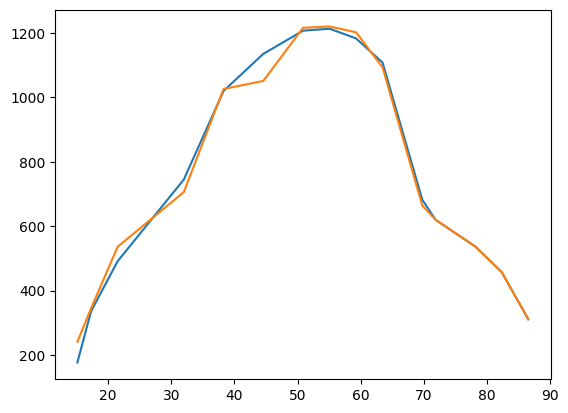

In [406]:
plt.plot(distancias,df[col_temp].iloc[0].values)
plt.plot(distancias,df[col_temp_2].iloc[0].values)

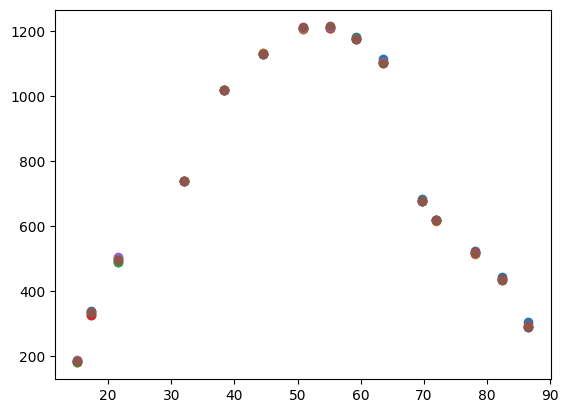

In [411]:
for f in np.unique(df.index.to_period('M')):
    plt.plot(distancias,df[col_temp][df.index.to_period('M')==f].mean(axis=0).values,'o')

# Prediction

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
def ventana_desl_sencilla(df,muestras,xtamano,ytmano):
    X_=[]
    y_=[]
    for i in range(muestras):
        X_.append(df[i:i+int(xtamano)])
        y_.append(df[i+int(xtamano):i+int(xtamano)+int(ytmano)])
    X_=np.array(X_)
    y_=np.array(y_)
    return X_, y_

In [12]:
X_,y_=ventana_desl_sencilla(df['k1'].values,df['k1'].shape[0]-262,15,5)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, shuffle=False)
X_prop_train, X_cal, y_prop_train, y_cal = train_test_split(X_train, y_train, test_size=0.25,shuffle=False)

In [14]:
model_k=KNeighborsRegressor(5).fit(X_prop_train,y_prop_train)

In [15]:
model_k.score(X_test,y_test)

0.949896873179058

In [16]:
y_hat=model_k.predict(X_test)

In [55]:
mean_squared_error(y_test,y_hat)

7.010660797233219

In [58]:
mean_absolute_error(y_test,y_hat)

1.7904644670875047

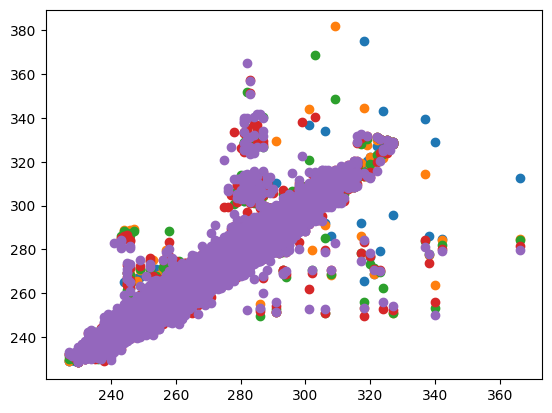

In [17]:
for i in range(5):
    plt.scatter(y_test[:,i],y_hat[:,i])

In [43]:
ejemplo_pronostico=df.loc[df.index.to_period('D')=='2024-11-03',['k1']].iloc[0:15]
ejemplo_pronostico2=df.loc[df.index.to_period('D')=='2024-11-03',['k1']].iloc[14:19]

In [64]:
ejemplo_pronostico.tail(1)

,k1
2024-11-03 00:14:00,272.0


In [48]:
pronostico_ej=model_k.predict(df.loc[df.index.to_period('D')=='2024-11-03',['k1']].iloc[0:15].values.reshape((1,-1)))

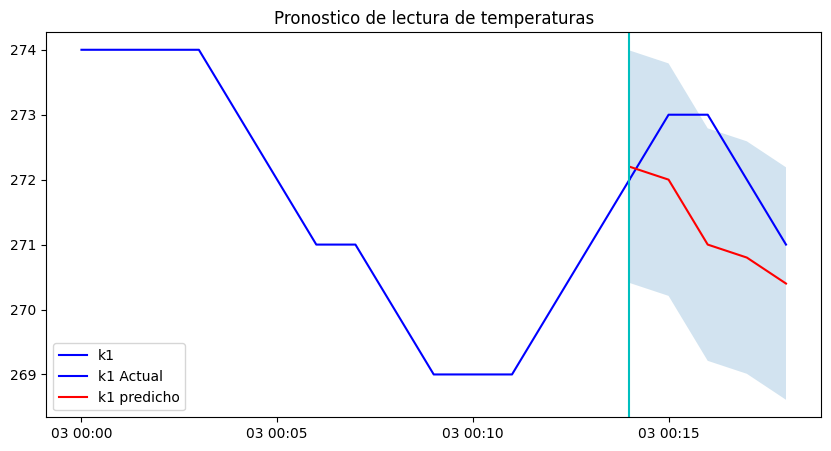

In [72]:
plt.figure(figsize=(10,5))
plt.plot(ejemplo_pronostico.index,ejemplo_pronostico.values,color='b', label='k1')
plt.plot(ejemplo_pronostico2.index,ejemplo_pronostico2.values, 'b', label='k1 Actual')
plt.plot(ejemplo_pronostico2.index,pronostico_ej[0], 'r', label='k1 predicho')
plt.fill_between(ejemplo_pronostico2.index,pronostico_ej[0]+1.79,pronostico_ej[0]-1.79, alpha=0.2)
plt.axvline(x=pd.Timestamp('2024-11-03 00:14:00'),color='c')
plt.title('Pronostico de lectura de temperaturas')
plt.legend()

### Conformal Pred

In [283]:
alfa=0.05
n_cal=len(y_cal)
cuan=np.ceil((n_cal+1)*(1-alfa))/n_cal
cuan

0.9500268924069873

In [281]:
y_pred_cal = model_k.predict(X_cal)
y_pred_test = model_k.predict(X_test)

In [282]:
y_cal_error = np.abs(y_cal - y_pred_cal)

In [287]:
q_yhat_cal=[]
for i in range(5):
    q_yhat_cal.append(np.quantile(y_cal_error[:,i],cuan))
q_yhat_cal

[1.7999999999999545,
 2.3999999999999773,
 3.0,
 3.7999999999999545,
 4.2000000000000455]

In [300]:
for i in range(5):
    res_=np.where(X_test[:,i]<=y_pred_test[:,i]+q_yhat_cal[i],1,0)+np.where(X_test[:,i]>=y_pred_test[:,i]-q_yhat_cal[i],1,0)
    print(np.where(res_==2,1,0).sum()/res_.shape[0])

0.3384135123265558
0.4432100084273997
0.5431043691913258
0.6581087015869624
0.7140144096665836


In [304]:
for i in range(5):
    print(mean_absolute_error(y_test[:,i],y_pred_test[:,i]))

0.7135609918218656
1.0291065769326668
1.300941257462999
1.5859155598286057
1.8298638559508142


In [305]:
for i in range(5):
    print(mean_absolute_error(y_cal[:,i],y_pred_cal[:,i]))

0.7063115309964269
1.0076421205247557
1.2597572667960648
1.515950705048759
1.7314828239365827


## Keras

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
k1,255562.0,265.092342,16.514626,212.0,255.0,265.0,275.0,490.0
k2,255562.0,184.447285,10.947905,67.0,178.0,184.0,190.0,393.0
k3,255562.0,361.169708,16.469294,308.0,351.0,361.0,371.0,566.0
k4,255562.0,332.337401,9.596013,176.0,326.0,332.0,339.0,396.0
s5,255562.0,530.655990,12.167864,431.0,524.0,530.0,536.0,730.0
s6,255562.0,497.395665,11.766185,0.0,490.0,495.0,502.0,721.0
s7,255562.0,708.992421,13.404899,540.0,701.0,709.0,717.0,865.0
s8,255562.0,740.365074,5.025901,488.0,738.0,740.0,742.0,837.0
s9,255562.0,1018.370712,8.474263,698.0,1014.0,1019.0,1024.0,1052.0
s10,255562.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0


In [77]:
def venana_des_sencilla_tensor(df,Tmuestas,xmuestra,ymuestra):
    X_a=[]
    y_a=[]
    for i in range(Tmuestas):
        X_a.append(df[i:i+int(xmuestra)].T)
        y_a.append(df[i+int(xmuestra):i+int(xmuestra)+int(ymuestra)].T)
    X_a=np.array(X_a)
    y_a=np.array(y_a)
    return X_a, y_a

In [214]:
medicione_=['k1', 'k2', 'k3', 'k4']

In [215]:
dfa=df[medicione_].copy()

In [ ]:
X_a,y_a=venana_des_sencilla_tensor(dfa.values,dfa['k1'].shape[0]-262,15,5)

In [83]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Flatten # type: ignore

In [217]:
X_traina, X_testa, y_traina, y_testa = train_test_split(X_a, y_a, test_size=0.33, shuffle=False)

In [223]:
X_a.shape

(255300, 4, 15)

In [224]:
model_rn=Sequential(name='modelo_ejemplo')
#model_rn.add(Flatten(input_shape=(30,15)))
model_rn.add(Dense(950, activation='relu', input_shape=(4,15)))
model_rn.add(Dense(250, activation='linear'))
model_rn.add(Dense(950, activation='relu'))
model_rn.add(Dense(5, activation='relu'))


c:\Users\ccollazos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [225]:
model_rn.summary()

Model: "modelo_ejemplo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 4, 950)         │        15,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4, 250)         │       237,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4, 950)         │       238,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4, 5)           │         4,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,155 (1.89 MB)

 Trainable params: 496,155 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [226]:
model_rn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [227]:
model_rn.fit(X_traina,y_traina, epochs=1)

5346/5346 ━━━━━━━━━━━━━━━━━━━━ 118s 22ms/step - loss: 320.9126 - mae: 5.0116


In [231]:
y_pred=model_rn.predict(X_testa)

2633/2633 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [266]:
y_pred[-1]

array([[262.31503, 262.85416, 263.33127, 262.829  , 263.24854],
       [175.60864, 175.61836, 175.41647, 175.08308, 175.64644],
       [359.7034 , 360.4253 , 361.0896 , 360.4481 , 360.97498],
       [324.86258, 325.2432 , 325.60275, 325.00467, 325.5409 ]],
      dtype=float32)

## Modelo 2

In [73]:
def r_cuadrado_coeff(y_real,y_pred):
    ss_res=np.sum(np.square( y_real-y_pred))
    ss_tot = np.sum(np.square( y_real - np.mean(y_real) ) )
    return (1-(ss_res/(ss_tot+np.finfo(float).eps))) 

In [74]:
col_horno=['k1','k3','s5','s7','s9','s11','s13','s15','s17','s19','k21','k2','k4','s6','s8','s12','s14','s16','s18','s20','k22','k23','k24','k25','k26']

In [106]:
df[termo_horno].describe().T

,count,mean,std,min,25%,50%,75%,max
k1,509194.0,264.312731,15.856600,176.4,255.0,263.80,272.8,513.5
k2,509194.0,187.457133,11.162816,64.4,181.1,187.40,193.6,394.0
k3,509194.0,361.688222,15.330759,297.2,352.8,361.50,370.1,597.2
k4,509194.0,337.069741,10.330386,0.0,331.0,338.00,344.0,447.0
s5,509194.0,532.461075,11.631734,422.2,526.2,532.40,538.2,745.1
s6,509194.0,494.232253,10.932415,0.0,489.0,492.00,498.0,728.0
s7,509194.0,711.808608,13.365935,518.4,703.9,712.00,719.6,881.9
s8,509194.0,739.827529,6.704401,0.0,738.0,740.00,742.0,856.0
s9,509194.0,1020.095516,9.623083,662.4,1015.9,1021.30,1025.5,1052.1
s10,509194.0,1020.000000,0.000000,1020.0,1020.0,1020.00,1020.0,1020.0


In [156]:
col_horno=['k2','k4','s6','s8','s12','s14','s16','s18','s20','k22','k23','k24','k25','k26']

In [157]:
dfhorno=df[col_horno].copy()

In [161]:
dfhorno['k2'].shape[0]

509194

In [169]:
dfhorno

,k2,k4,s6,s8,s12,s14,s16,s18,s20,k22,k23,k24,k25,k26
_time,,,,,,,,,,,,,,
2024-01-01 00:00:00-05:00,192.9,345.0,489.0,735.0,1133.0,1211.0,1213.0,1181.0,1113.0,681.7,620.0,520.7,446.9,292.0
2024-01-01 00:01:00-05:00,191.2,345.0,489.0,735.0,1134.0,1211.0,1213.0,1181.0,1112.0,682.5,620.0,520.1,445.8,292.0
2024-01-01 00:02:00-05:00,191.4,345.0,490.0,736.0,1134.0,1211.0,1212.0,1181.0,1112.0,683.1,620.0,519.4,445.0,290.0
2024-01-01 00:03:00-05:00,192.1,345.0,490.0,736.0,1134.0,1211.0,1212.0,1181.0,1111.0,683.2,620.0,519.6,444.9,289.0
2024-01-01 00:04:00-05:00,192.1,344.0,490.0,734.0,1134.0,1211.0,1212.0,1181.0,1111.0,683.1,620.0,520.3,445.8,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19 14:29:00-05:00,195.4,346.0,504.0,741.0,1125.0,1214.0,1215.0,1178.0,1105.0,683.2,621.0,518.2,431.2,291.0
2024-12-19 14:30:00-05:00,193.4,346.0,505.0,742.0,1124.0,1214.0,1215.0,1178.0,1104.0,683.3,621.0,518.3,431.0,291.0
2024-12-19 14:31:00-05:00,189.6,346.0,505.0,742.0,1123.0,1214.0,1215.0,1177.0,1104.0,683.2,621.0,518.2,431.1,290.0


In [84]:
x_1.shape

(256351, 25, 60)

In [80]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size=0.33, shuffle=False)
X_prop_train1, X_cal1, y_prop_train1, y_cal1 = train_test_split(X_train1, y_train1, test_size=0.25,shuffle=False)

In [89]:
model_h=Sequential(name='modelo_horno_forcast_temp')
#model_rn.add(Flatten(input_shape=(30,15)))
model_h.add(Dense(100, activation='relu', input_shape=(25,60)))
model_h.add(Dense(25, activation='linear'))
model_h.add(Dense(100, activation='relu'))
model_h.add(Dense(14, activation='linear'))


In [90]:
model_h.summary()

Model: "modelo_horno_forcast_temp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 25, 950)        │        57,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25, 250)        │       237,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25, 950)        │       238,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25, 14)         │        13,314 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 547,464 (2.09 MB)

 Trainable params: 547,464 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model_h.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [93]:
model_h.fit(X_prop_train1,y_prop_train1, epochs=3)

Epoch 1/3
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 220s 40ms/step - loss: 3083.2646 - mae: 11.8012
Epoch 2/3
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 159s 39ms/step - loss: 69.0583 - mae: 5.1418
Epoch 3/3
4026/4026 ━━━━━━━━━━━━━━━━━━━━ 157s 39ms/step - loss: 61.8480 - mae: 5.1108


In [94]:
alfa=0.05
n_cal=len(y_cal1)
cuan=np.ceil((n_cal+1)*(1-alfa))/n_cal
cuan

0.9500221244090454

In [95]:
y_pred_cal1 = model_h.predict(X_cal1)
y_pred_test1 = model_h.predict(X_test1)

1342/1342 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
2644/2644 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step


In [ ]:
#model_h.save('mlp_horno_temperaturas_14_min.keras') 

In [98]:
for i in range(14):
    print(np.sqrt(mean_squared_error(y_test1[i],y_pred_test1[i])))

4.536720204605161
4.458404706844694
4.368586342987791
4.281573800013245
4.2278106120608445
4.205907353222718
4.216186721877393
4.260267011499255
4.336611954811064
4.4130748662158386
4.4714414179690385
4.514256134128073
4.498684389725595
4.45915393745731


In [99]:
r_cuadrado_coeff(y_cal1,y_pred_cal1)

0.9998116164547926

In [100]:
r_cuadrado_coeff(y_test1,y_pred_test1)

0.9998634583097985

In [101]:
X_test1.shape

(84596, 25, 60)

In [102]:
X_ejemplo=dfhorno.loc[dfhorno.index.to_period('D')=='2024-11-25'].iloc[0:60]
X_ejemplo=X_ejemplo.values.T.reshape((1,25,60))

In [103]:
predicho_ejemplo=model_h.predict(X_ejemplo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [105]:
predicho_ejemplo=predicho_ejemplo.reshape(25,14).T

In [109]:
y_ejemplo=dfhorno.loc[dfhorno.index.to_period('D')=='2024-11-25'].iloc[60:74].values

Text(0.5, 0.98, 'Resultados Pronostico Ejemplo')

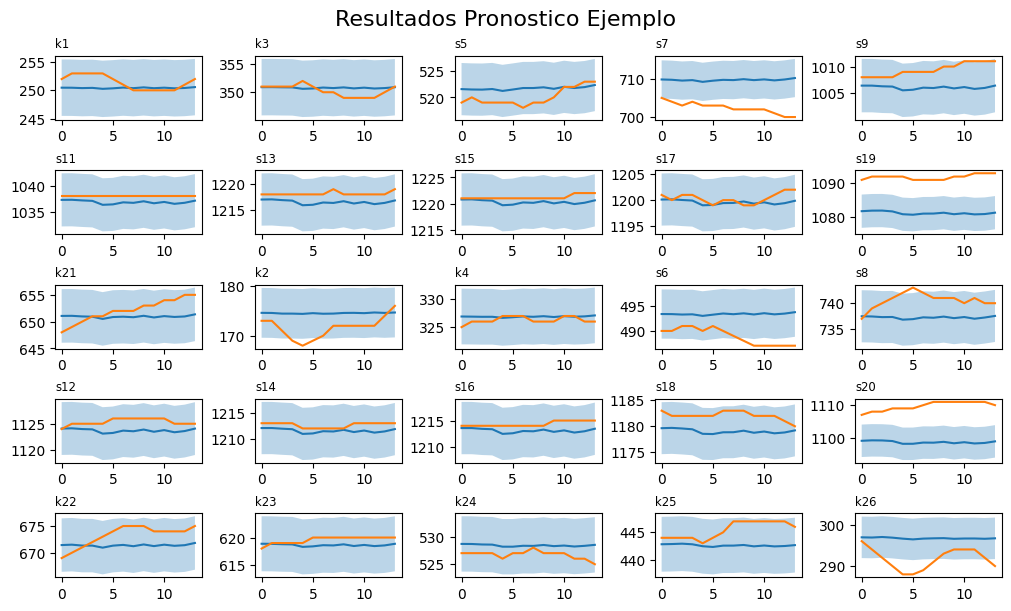

In [127]:
fig, axs = plt.subplots(5, 5, figsize=(10, 6), layout='constrained')
for ax,n in zip(axs.flat, range(25)):
    ax.plot(predicho_ejemplo[:,n])
    ax.fill_between(range(14),predicho_ejemplo[:,n]+5,predicho_ejemplo[:,n]-5, alpha=0.3)
    ax.set_title(dfhorno.columns[n], fontsize='small', loc='left')
    ax.plot(y_ejemplo[:,n])

fig.suptitle('Resultados Pronostico Ejemplo', fontsize=16)